In [1]:
import pandas as pd
import numpy as np

# import os
# import sys
# module_path = os.path.abspath(os.path.join('..'))
# print(module_path)
# sys.path.append(module_path)
import model.parts.utils as utils
from model.sys_params import *
tax_df = pd.read_pickle(r'index_spoofer_scen_3_delegation_tax.p')
chance_df = pd.read_pickle(r'index_spoofer_scen_3_slash_chance.p')
percent_df = pd.read_pickle(r'index_spoofer_scen_3_slash_percent.p')

stakeDelegateds: 605 events
stakeDelegatedLockeds: 375 events
stakeDelegatedWithdrawns: 326 events
allocationCloseds: 47 events
allocationCollecteds: 16 events
stakeDepositeds: 25 events
rewardsAssigneds: 47 events
delegationParametersUpdateds: 6 events
allocationCreateds: 51 events
TOTAL NUMBER OF EVENTS: 1529
You should set SIMULATION_TIME_STEPS in config.py to a minimum of 1529 to capture all events.



In [2]:
from model.config import *

running file: sim_setup.py
end of file: sim_setup.py


In [3]:
experiment = simulation_config

In [4]:
tax_df.reset_index(inplace = True)
chance_df.reset_index(inplace = True)
percent_df.reset_index(inplace = True)


In [5]:
tax_df.head()

,index,indexers,delegator_portfolios,block_number,epoch,injected_event_shift,simulation,subset,run,substep,timestep
0,6,{1: <model.parts.index_spoofer.IndexSpoofer ob...,{},11474009,4,1,0,0,1,6,1
1,12,{1: <model.parts.index_spoofer.IndexSpoofer ob...,{},11474009,4,1,0,0,1,6,2
2,18,{1: <model.parts.index_spoofer.IndexSpoofer ob...,{},11474009,4,2,0,0,1,6,3
3,24,{1: <model.parts.index_spoofer.IndexSpoofer ob...,{},11474009,4,2,0,0,1,6,4
4,30,{1: <model.parts.index_spoofer.IndexSpoofer ob...,{},11474307,4,3,0,0,1,6,5


In [8]:
import matplotlib.pyplot as plt

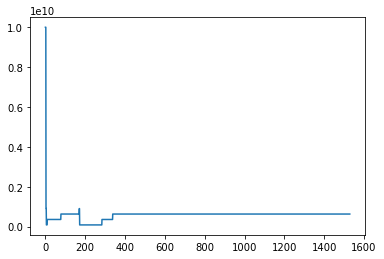

In [3]:
import matplotlib.pyplot as plt
GRT_list = []
for i in df['indexers']:
    GRT_list.append(i[1].GRT)
plt.plot(df.index, GRT_list)

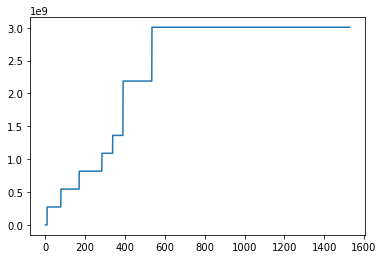

In [4]:
holdings_list = []
for i in df['indexers']:
    if i[1].holdings is not None:
        holdings_list.append(i[1].holdings)
    else:
        holdings_list.append(0)
plt.plot(df.index, holdings_list)

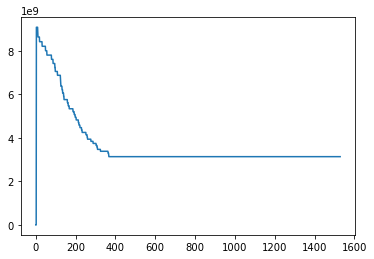

In [5]:
deposited_stake_list = []
for i in df['indexers']:
    if i[1].cumulative_deposited_stake is not None:
        deposited_stake_list.append(i[1].cumulative_deposited_stake)
    else:
        deposited_stake_list.append(0)
plt.plot(df.index, deposited_stake_list)

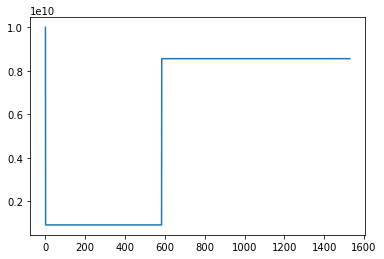

In [6]:
holdings_list = []
for i in df['indexers']:
    if 1 not in i[1].delegators:
        holdings_list.append(0)
    else:
        holdings_list.append(i[1].delegators[1].holdings)
plt.plot(df.index, holdings_list)

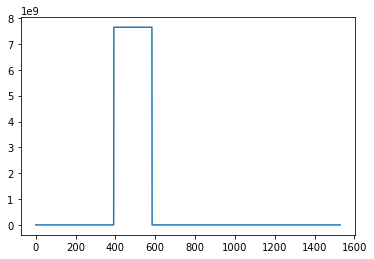

In [7]:
undelegated_list = []
for i in df['indexers']:
    if 1 not in i[1].delegators:
        undelegated_list.append(0)
    else:
        undelegated_list.append(i[1].delegators[1].undelegated_tokens)
plt.plot(df.index, undelegated_list)

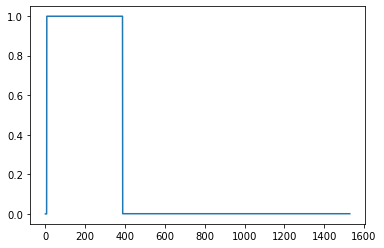

In [8]:
subgraph_list = []
for i in df['indexers']:
    if i[1].indexer_revenue_cut == None:
        subgraph_list.append(0)
    else:
        subgraph_list.append(i[1].indexer_revenue_cut)
plt.plot(df.index, subgraph_list)

In [6]:
tax_diff_params_dfs = {}
for i in tax_df['subset'].unique():
    tax_diff_params_dfs[i] = tax_df[tax_df['subset'] == i]

chance_diff_params_dfs = {}
for i in chance_df['subset'].unique():
    chance_diff_params_dfs[i] = chance_df[chance_df['subset'] == i]

percent_diff_params_dfs = {}
for i in percent_df['subset'].unique():
    percent_diff_params_dfs[i] = percent_df[percent_df['subset'] == i]

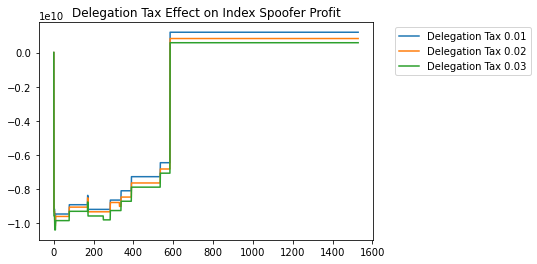

In [14]:
for i in tax_diff_params_dfs.keys():
    # estimate of value
    # TODO: get value of tax from experiment_config 
    tax = (i+1)*0.01
    profit_list = []
    plot_df = tax_diff_params_dfs[i]
    #plot_df.reset_index(inplace = True)
    initial_GRT = plot_df['indexers'][0][1].GRT
    initial_holdings = plot_df['indexers'][0][1].delegators[1].holdings
    for j in plot_df['indexers']:
        if j[1].holdings is not None:
            profit_list.append(j[1].holdings + j[1].GRT + j[1].delegators[1].holdings + j[1].cumulative_deposited_stake \
            - initial_GRT - initial_holdings)
        else:
            profit_list.append(0)
    plt.plot(plot_df.index, profit_list, label = f'Delegation Tax {tax}')
    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))
    plt.title('Delegation Tax Effect on Index Spoofer Profit')  

Here we see as delegation tax increases, profit decreases which is expected. 

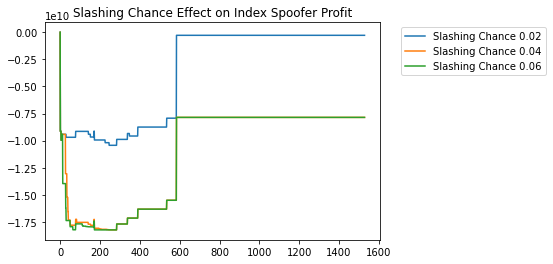

In [19]:
for i in chance_diff_params_dfs.keys():
    # estimate of value
    # TODO: get value of slashing chance from experiment_config 
    # store experiment_config when running indexer_experiment.py
    chance = (i+1)*(0.02)
    profit_list = []
    plot_df = chance_diff_params_dfs[i]
    #plot_df.reset_index(inplace = True)
    initial_GRT = plot_df['indexers'][0][1].GRT
    initial_holdings = plot_df['indexers'][0][1].delegators[1].holdings
    for j in plot_df['indexers']:
        if j[1].holdings is not None:
            profit_list.append(j[1].holdings + j[1].GRT + j[1].delegators[1].holdings + j[1].cumulative_deposited_stake \
            - initial_GRT - initial_holdings)
        else:
            profit_list.append(0)
    plt.plot(plot_df.index, profit_list, label = f'Slashing Chance {chance}')
    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))
    plt.title('Slashing Chance Effect on Index Spoofer Profit')  

Here we see that as slashing becomes more frequent, the index spoofer loses more which is expected, however when slashing is very frequent there is no difference as there is a limited number of tokens to be slashed. We increase the chance to be slashed as based on the current data, only one indexer out of 206 got slashed, and we see that even with a slashing chance of 2% the effect the small. 

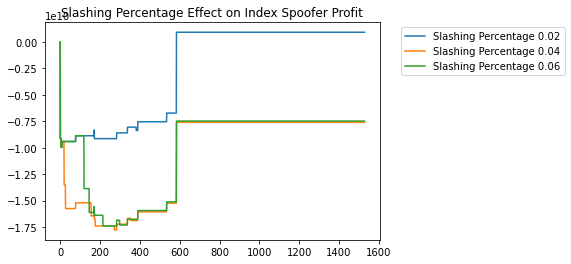

In [22]:
for i in percent_diff_params_dfs.keys():
    # estimate of value
    # TODO: get value of slashing percent from experiment_config 
    percent = (i+1)*(0.02)
    profit_list = []
    plot_df = percent_diff_params_dfs[i]
    #plot_df.reset_index(inplace = True)
    initial_GRT = plot_df['indexers'][0][1].GRT
    initial_holdings = plot_df['indexers'][0][1].delegators[1].holdings
    for j in plot_df['indexers']:
        if j[1].holdings is not None:
            profit_list.append(j[1].holdings + j[1].GRT + j[1].delegators[1].holdings + j[1].cumulative_deposited_stake \
            - initial_GRT - initial_holdings)
        else:
            profit_list.append(0)
    plt.plot(plot_df.index, profit_list, label = f'Slashing Percentage {percent}')
    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))
    plt.title('Slashing Percentage Effect on Index Spoofer Profit') 

Here we see that as slashing percentage is increased, the index spoofer cannot profit, as the chance that slashing is random, and there are only a limited number of tokens that can be slashed, we don't see much difference at higher percentages. 